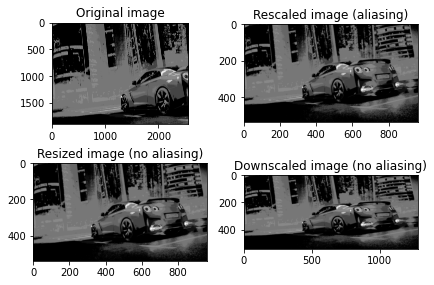

In [23]:
#**Задание1** : загрузить свою картинку(PIL - numpy) и получить 4 варианта масштаба как в примере

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image as img

image = np.array(img.open(r"C:\Users\Федя\Desktop\комп граф\9\GTR_one_love.bmp"))


image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 2560)
ax[0].set_ylim(1900, 0)
plt.tight_layout()
plt.show()

Задание2 : загрузить свою картинку(PIL - numpy) и получить варианта swirl как в примере (установите свои параметры : 4 экземпляра примеров)

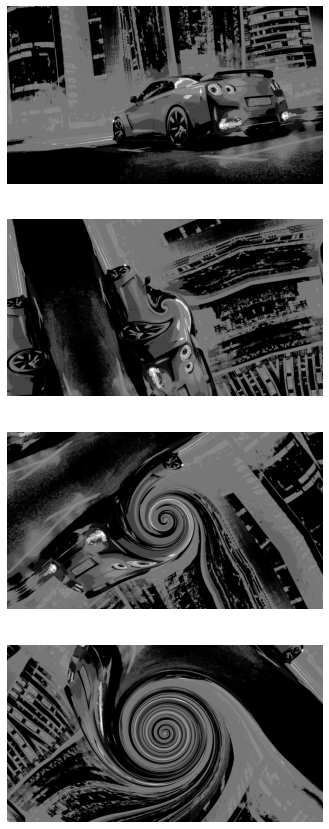

In [24]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl


image = np.array(img.open(r"C:\Users\Федя\Desktop\комп граф\9\GTR_one_love.bmp"))
swirled = swirl(image, rotation=5, strength=5, radius=800)
swirled2 = swirl(image, rotation=10, strength=15, radius=1200)
swirled3 = swirl(image, rotation=15, strength=35, radius=1600)
fig, ax = plt.subplots(nrows=4, figsize=(15, 15),
                               sharex=True, sharey=True)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].imshow(swirled, cmap=plt.cm.gray)
ax[1].axis('off')
ax[2].imshow(swirled2, cmap=plt.cm.gray)
ax[2].axis('off')
ax[3].imshow(swirled3, cmap=plt.cm.gray)
ax[3].axis('off')
plt.show()

Задание3 : введите 4 2Д точки примените к ним трансформации разного типа (4 примера), выведите координаты точек до и после на одном графике (как в лр3)

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

tform = transform.SimilarityTransform(scale=1, rotation=math.pi/6,
                                      translation=(0, 1)) #координаты переноса
print(tform.params) 

#преобразование матрицы преобразования 
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = transform.SimilarityTransform(matrix)

coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  1.       ]
 [ 0.         0.         1.       ]]
[[0.8660254 2.5      ]]
[[ 0.5       -0.8660254]]


[[ 5.09781959  1.73557929 28.        ]
 [ 2.25893885  4.88847576 37.        ]
 [ 2.15426694  2.89121669 29.        ]]


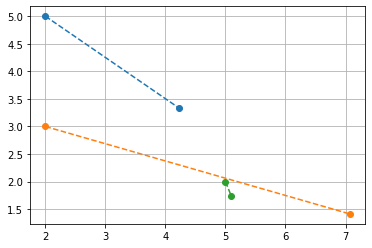

In [26]:
coord2 = [3,7]
tform3 = transform.SimilarityTransform(scale=1, rotation=math.pi/60,
                                      translation=(3, 5))

P1 = [5,2,3]
P2 = [2,5,6]
P3 = [2,3,8]
P = np.array([P1,P2,P3])
P_new = np.dot(P,tform2)
P_new2=np.dot(P,tform)
P_new3=np.dot(P,tform3)
print(P_new3)
plt.plot([P[1,0], P_new[1,0]],[P[1,1],P_new[1,1]],'o--')
plt.plot([P[2,0], P_new2[2,0]],[P[2,1],P_new2[2,1]],'o--')
plt.plot([P[0,0], P_new3[0,0]],[P[0,1],P_new3[0,1]],'o--')
plt.grid()    
plt.show()    

Задание4 : загрузить свою картинку(PIL - numpy) и получить варианта трансформаций как в примере (установите свои параметры : 4 экземпляра примеров)


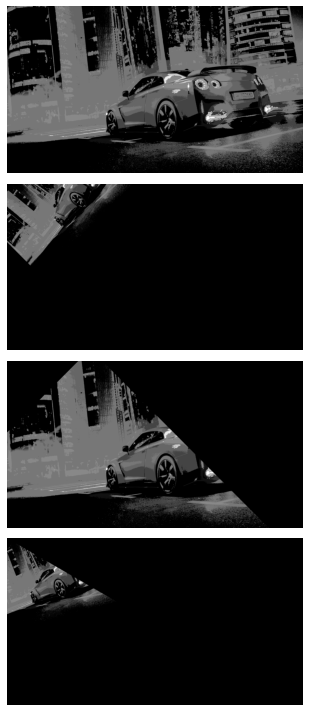

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

text = np.array(img.open(r"C:\Users\Федя\Desktop\комп граф\9\GTR_one_love.bmp"))

tform = transform.SimilarityTransform(scale=2, rotation=math.pi/4,
                                      translation=(text.shape[0]/2, -155))

rotated = transform.warp(text, tform)
back_rotated = transform.warp(rotated, tform.inverse)
back_rotated2 = transform.warp(rotated, tform2.inverse)
fig, ax = plt.subplots(nrows=4,figsize=(10,10))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)
ax[3].imshow(back_rotated2, cmap=plt.cm.gray)
for a in ax:
    a.axis('off')

plt.tight_layout()